In [104]:
# import os
# import json
# import pandas as pd
# import numpy as np
# def process_json_file(filepath, label):
#     with open(filepath, 'r') as f:
#         data = json.load(f)

#     results = data.get("analyses", {})
#     contract = results.get("contract", {})
#     holder = results.get("holder", {})
#     liquidity = results.get("liquidity", {})
#     security = results.get("security", {})
#     lifecycle = results.get("lifecycle", {})

#     token_address = data.get("token_address")
#     token_name = data.get("token_name")
#     chain = data.get("chain")

#     # Ownership logic (same as before)
#     owner_exceeds = holder.get("owner", {}).get("exceeds_5_percent")
#     creator_exceeds = holder.get("creator", {}).get("exceeds_5_percent")

#     if owner_exceeds is None and creator_exceeds is None:
#         owner_and_creator_circulating_share_below_5 = None
#     elif owner_exceeds is None:
#         owner_and_creator_circulating_share_below_5 = creator_exceeds
#     elif creator_exceeds is None:
#         owner_and_creator_circulating_share_below_5 = owner_exceeds
#     else:
#         owner_and_creator_circulating_share_below_5 = owner_exceeds and creator_exceeds

#     lp_owner_exceeds = holder.get("owner", {}).get("exceeds_5_percent")
#     lp_creator_exceeds = holder.get("creator", {}).get("exceeds_5_percent")

#     if lp_owner_exceeds is None and lp_creator_exceeds is None:
#         lp_owner_and_creator_circulating_share_below_5 = None
#     elif lp_owner_exceeds is None:
#         lp_owner_and_creator_circulating_share_below_5 = lp_creator_exceeds
#     elif lp_creator_exceeds is None:
#         lp_owner_and_creator_circulating_share_below_5 = lp_owner_exceeds
#     else:
#         lp_owner_and_creator_circulating_share_below_5 = lp_owner_exceeds and lp_creator_exceeds

    

#     try:
#         token_row = {
#             "token_address": token_address,
#             # "chain": chain,
#             # "token_name": token_name,
#             #"effective_slippage_rate": ,
#             "owner_and_creator_circulating_share_below_5": int(owner_and_creator_circulating_share_below_5) if owner_and_creator_circulating_share_below_5 is not None else None,
#             "community_circulating_share_below_5": 1 if holder.get('howmany_holders_exceeding_5_percent_circulating', 1) == 0 else 0,
#             "top_holders_circulating_share_below_70": 1 if holder.get('top_10_less_than_70_percent_of_circulating') == True else 0,
#             "locked_liquidity_percentage": liquidity.get("locked_liquidity_percent"),
#             "owner_or_creator_liquidity_share_below_5": int(lp_owner_and_creator_circulating_share_below_5) if lp_owner_and_creator_circulating_share_below_5 is not None else None,
#             "liquidity_lock_compliance": int(liquidity.get("locked_95_for_15_days", False)),
#             "token_age": round(float(lifecycle.get("token_age_seconds", 0)) / 86400),
#             "inactive_days": lifecycle.get("inactive_days", 0),
#             "is_source_code_verified": int(contract.get("verified", False)),
#             "minting_capabilities": contract.get("code_analysis", {}).get("patterns_found", {}).get("minting_mechanics", {}).get("count", 0),
#             "ownership_renounced": 1 if contract.get("owner", "").lower() == "0x0000000000000000000000000000000000000000" else 0,
#             "selling_allowed": int(contract.get("is_sellable", False)),
#             "block_based_sell_lock": contract.get("code_analysis", {}).get("patterns_found", {}).get("block_based_restrictions", {}).get("count", 0),
#             "high_transfer_sell_tax": contract.get("code_analysis", {}).get("patterns_found", {}).get("stealth_fee_mechanics", {}).get("count", 0),
#             "address_filtering": contract.get("code_analysis", {}).get("patterns_found", {}).get("ownership_manipulation", {}).get("count", 0),
#             "trading_disabled": contract.get("code_analysis", {}).get("patterns_found", {}).get("transfer_blocking", {}).get("count", 0),
#             "liquidity_lock_status": 1 if liquidity.get("locked_liquidity_percent", 0.0) != 0.0 else 0,
#             "liquidity_lock_duration": liquidity.get("lock_duration", 0),
#             "liquidity_pool_depth": liquidity.get("liquidity_usd", 0),
#             "holder_count": liquidity.get("total_holders", 0),
#             "suspicious_deployment_patterns": contract.get("code_analysis", {}).get("patterns_found", {}).get("anti_analysis_features", {}).get("count", 0),
#             "malicious_address_interaction": security.get("howmany_suspicious_addresses", 0),
#             "hardcoded_privileged_addresses": int(contract.get("is_hardcoded_owner", False)),
#             "hidden_owner": int(contract.get("is_hidden_owner", False)),
#             "self_destruction_capability": contract.get("code_analysis", {}).get("patterns_found", {}).get("emergencyFunctions", {}).get("count", 0),
#             "liquidity_to_market_cap_ratio": liquidity.get("liquidity_to_market_cap_ratio", 0),
#             "volume_to_liquidity_ratio": liquidity.get("volume_to_liquidity_ratio", 0),
#             "label": label
#         }
#     except Exception as e:
#         print(f"Failed processing {filepath}: {e}")
#         return None

#     return token_row

# # Directories
# good_dir = "C:/Users/Famiglia/Desktop/Amedeo/TESI/Progetto_tesi/thesis/goodtokens_data_collection/new"
# bad_dir = "results_bad/"

# data_rows = []

# # Process bad tokens (label = 0)
# # for filename in os.listdir(bad_dir):
# #     if filename.endswith(".json"):
# #         filepath = os.path.join(bad_dir, filename)
# #         row = process_json_file(filepath, label=0)
# #         if row:
# #             data_rows.append(row)

# # Process good tokens (label = 1)
# for filename in os.listdir(good_dir):
#     if filename.endswith(".json"):
#         filepath = os.path.join(good_dir, filename)
#         row = process_json_file(filepath, label=1)
#         if row:
#             data_rows.append(row)

# # Create DataFrame
# df = pd.DataFrame(data_rows)
# df.to_csv("labeled_token_dataset.csv", index=False)
# print("✅ Dataset created with shape:", df.shape)


In [105]:
import pandas as pd
import glob
import os
import json
json_files_good = glob.glob(os.path.join("C:/Users/Famiglia/Desktop/Amedeo/TESI/Progetto_tesi/thesis/goodtokens_data_collection/new", "*.json"))
json_files_bad = glob.glob(os.path.join("C:/Users/Famiglia/Desktop/Amedeo/TESI/Progetto_tesi/thesis/badtokens_data_collection/new", "*.json"))

In [106]:
columns_to_keep = [
    "token_address",
    "analyses.holder.owner.exceeds_5_percent",
    "analyses.holder.creator.exceeds_5_percent",
    "analyses.holder.howmany_holders_exceeding_5_percent_circulating",
    "analyses.holder.top_10_less_than_70_percent_of_circulating",
    "analyses.liquidity.slippage_is_suspicious",
    "analyses.liquidity.locked_liquidity_percent",
    "analyses.liquidity.owner_under_5_percent",
    "analyses.liquidity.creator_under_5_percent",
    "analyses.liquidity.locked_95_for_15_days",
    "analyses.lifecycle.token_age_seconds",
    "analyses.lifecycle.inactive_days",
    "analyses.contract.verified",
    "analyses.contract.code_analysis.patterns_found.minting_mechanics.count",
    "analyses.contract.is_sellable",
    "analyses.contract.code_analysis.patterns_found.block_based_restrictions.count",
    "analyses.contract.code_analysis.patterns_found.stealth_fee_mechanics.count",
    "analyses.contract.code_analysis.patterns_found.ownership_manipulation.count",
    "analyses.contract.code_analysis.patterns_found.transfer_blocking.count",
    "analyses.liquidity.locked_liquidity_percent",
    "analyses.liquidity.lock_duration",
    "analyses.liquidity.liquidity_usd",
    "analyses.holder.total_holders",
    "analyses.contract.code_analysis.patterns_found.anti_analysis_features.count",
    "analyses.security.howmany_suspicious_addresses",
    "analyses.contract.is_hardcoded_owner",
    "analyses.contract.is_hidden_owner",
    "analyses.contract.code_analysis.patterns_found.emergencyFunctions.count",
    "analyses.liquidity.liquidity_to_market_cap_ratio",
    "analyses.liquidity.volume_to_liquidity_ratio"
]


In [107]:
def load_json_source(source):
    """
    Load a JSON source.

    Parameters:
        source (str or list): Path to a JSON file or already-loaded JSON object (dict/list).

    Returns:
        list: List of JSON records.
    """
    if isinstance(source, str):
        # Load JSON from file
        with open(source, "r") as f:
            data = json.load(f)
    elif isinstance(source, (dict, list)):
        # Already a loaded JSON object
        data = source
    else:
        raise ValueError("Source must be a file path or a loaded JSON object (dict or list).")

    return data if isinstance(data, list) else [data]

def extract_fields(record, keys):
    """
    Extract only dot-notated keys from a dict record.

    Parameters:
        record (dict): JSON record.
        keys (list): List of dot-notated keys to extract.

    Returns:
        dict: Flattened dict containing only selected keys.
    """
    out = {}
    for k in keys:
        parts = k.split(".")
        val = record
        try:
            for p in parts:
                val = val[p]
            out[k] = val
        except (KeyError, TypeError):
            out[k] = None  # fill missing with None
    return out

def load_json_files(sources, columns_to_keep):
    """
    Load JSON file(s) or JSON objects and extract only selected fields.

    Parameters:
        sources (str, list, or list of dicts): Single JSON file path, list of JSON file paths,
                                              or list of loaded JSON objects.
        columns_to_keep (list): List of dot-notated keys to extract.

    Returns:
        pd.DataFrame: Flattened DataFrame containing only selected columns.
    """
    # Ensure we have a list
    if not isinstance(sources, list):
        sources = [sources]

    all_records = []

    for src in sources:
        records = load_json_source(src)
        for r in records:
            all_records.append(extract_fields(r, columns_to_keep))

    df = pd.DataFrame(all_records)
    return df


In [108]:
d_good = load_json_files(json_files_good, columns_to_keep)
d_bad = load_json_files(json_files_bad, columns_to_keep)


In [109]:
d_bad['analyses.liquidity.locked_liquidity_percent'].value_counts()

analyses.liquidity.locked_liquidity_percent
0.00      1268
100.00     648
99.50       23
99.99       16
99.98       13
          ... 
97.54        1
99.75        1
92.63        1
57.87        1
20.08        1
Name: count, Length: 124, dtype: int64

In [110]:
d_bad

,token_address,analyses.holder.owner.exceeds_5_percent,analyses.holder.creator.exceeds_5_percent,analyses.holder.howmany_holders_exceeding_5_percent_circulating,analyses.holder.top_10_less_than_70_percent_of_circulating,analyses.liquidity.slippage_is_suspicious,analyses.liquidity.locked_liquidity_percent,analyses.liquidity.owner_under_5_percent,analyses.liquidity.creator_under_5_percent,analyses.liquidity.locked_95_for_15_days,...,analyses.liquidity.lock_duration,analyses.liquidity.liquidity_usd,analyses.holder.total_holders,analyses.contract.code_analysis.patterns_found.anti_analysis_features.count,analyses.security.howmany_suspicious_addresses,analyses.contract.is_hardcoded_owner,analyses.contract.is_hidden_owner,analyses.contract.code_analysis.patterns_found.emergencyFunctions.count,analyses.liquidity.liquidity_to_market_cap_ratio,analyses.liquidity.volume_to_liquidity_ratio
0,0x002127Ec60f4b0F75F7AE20565D1d0cd99993dD3,True,True,2,False,True,100.0,False,False,False,...,0,1.928935e-15,36,None,0,False,False,NaN,1.837454e-18,0.0
1,0x002A029d13f423227A24641CD5Fec448A52FEa32,True,True,3,False,True,0.0,False,False,False,...,0,1.235624e-03,118,None,0,False,False,NaN,1.756233e-06,0.0
2,0x0079C34BaDa93B2ff613913Cde64E53aE6168fBa,True,True,0,True,False,0.0,False,False,False,...,0,5.821181e-03,21,None,0,False,False,NaN,6.867044e-07,0.0
3,0x007C5Ade505C1455a072207b0C5b9CF3Ac79B251,True,True,0,False,True,0.0,False,False,False,...,0,2.012442e-01,24,None,0,False,False,NaN,1.342389e-09,0.0
4,0x008B19CF90896BB20c4619c59Ef4c2bC55B7674e,None,None,4,False,True,0.0,True,True,False,...,0,1.121011e-02,37,None,0,False,False,NaN,4.288567e-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,0xFf574F1e53bDA695E5F7719E8E29811325367bd9,True,True,0,False,True,0.0,True,False,False,...,0,2.494257e-03,83,None,0,None,False,NaN,7.816680e-15,0.0
2119,0xFF82275F985170CA9F9EcCf3e65bd6207E13395B,True,True,0,False,True,100.0,True,False,False,...,0,2.238419e-10,75,None,0,None,False,NaN,1.800000e-19,0.0
2120,0xfFAed3d9774f321a4DADdc972d13C8f994f07337,None,True,0,False,True,0.0,True,False,False,...,0,2.303834e-01,13,None,0,None,True,NaN,1.025360e-10,0.0
2121,0xffb0E8162d6726214914d2480CC6A6E5915EB0DD,True,True,0,True,False,0.0,False,False,False,...,0,8.821227e-04,17,None,0,False,False,NaN,4.951521e-08,0.0


In [111]:
d_good['label'] = 1
d_bad['label'] = 0

In [112]:
df = pd.concat([d_good,d_bad])

C:\Users\Famiglia\AppData\Local\Temp\ipykernel_16268\3400929055.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([d_good,d_bad])


In [113]:
len(df)
master_dataset = df.copy()

In [114]:
dtype_dict = master_dataset.dtypes.apply(lambda x: x.name).to_dict()

In [115]:
dtype_dict

{'token_address': 'object',
 'analyses.holder.owner.exceeds_5_percent': 'object',
 'analyses.holder.creator.exceeds_5_percent': 'object',
 'analyses.holder.howmany_holders_exceeding_5_percent_circulating': 'int64',
 'analyses.holder.top_10_less_than_70_percent_of_circulating': 'object',
 'analyses.liquidity.slippage_is_suspicious': 'object',
 'analyses.liquidity.locked_liquidity_percent': 'float64',
 'analyses.liquidity.owner_under_5_percent': 'object',
 'analyses.liquidity.creator_under_5_percent': 'object',
 'analyses.liquidity.locked_95_for_15_days': 'object',
 'analyses.lifecycle.token_age_seconds': 'float64',
 'analyses.lifecycle.inactive_days': 'float64',
 'analyses.contract.verified': 'bool',
 'analyses.contract.code_analysis.patterns_found.minting_mechanics.count': 'float64',
 'analyses.contract.is_sellable': 'bool',
 'analyses.contract.code_analysis.patterns_found.block_based_restrictions.count': 'float64',
 'analyses.contract.code_analysis.patterns_found.stealth_fee_mechanics

In [116]:
master_dataset.dtypes

token_address                                                                     object
analyses.holder.owner.exceeds_5_percent                                           object
analyses.holder.creator.exceeds_5_percent                                         object
analyses.holder.howmany_holders_exceeding_5_percent_circulating                    int64
analyses.holder.top_10_less_than_70_percent_of_circulating                        object
analyses.liquidity.slippage_is_suspicious                                         object
analyses.liquidity.locked_liquidity_percent                                      float64
analyses.liquidity.owner_under_5_percent                                          object
analyses.liquidity.creator_under_5_percent                                        object
analyses.liquidity.locked_95_for_15_days                                          object
analyses.lifecycle.token_age_seconds                                             float64
analyses.lifecycle.in

In [117]:
len(master_dataset.columns)

30

In [118]:
# Basic data exploration
print("=== DATA EXPLORATION ===")

print(f"\n1. Dataset Overview:")
print(f"   Shape: {master_dataset.shape}")
print(f"   Memory usage: {master_dataset.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n2. Label Distribution:")
label_counts = master_dataset['label'].value_counts()
for label, count in label_counts.items():
    label_name = "Good tokens" if label == 1 else "Bad tokens"
    percentage = (count / len(master_dataset)) * 100
    print(f"   {label_name} (label={label}): {count} ({percentage:.1f}%)")

print(f"\n3. Missing Values:")
missing_summary = master_dataset.isnull().sum()
missing_pct = (missing_summary / len(master_dataset)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_summary,
    'Missing %': missing_pct
}).sort_values('Missing Count', ascending=False)

# Show only columns with missing values
missing_df_filtered = missing_df[missing_df['Missing Count'] > 0]
if len(missing_df_filtered) > 0:
    print(missing_df_filtered.head(50))
else:
    print("   No missing values found!")

print(f"\n4. Data Types:")
dtype_summary = master_dataset.dtypes.value_counts()
for dtype, count in dtype_summary.items():
    print(f"   {dtype}: {count} columns")


=== DATA EXPLORATION ===

1. Dataset Overview:
   Shape: (3123, 30)
   Memory usage: 1.60 MB

2. Label Distribution:
   Bad tokens (label=0): 2123 (68.0%)
   Good tokens (label=1): 1000 (32.0%)

3. Missing Values:
                                                    Missing Count   Missing %
analyses.contract.code_analysis.patterns_found....           3123  100.000000
analyses.contract.code_analysis.patterns_found....           3120   99.903939
analyses.contract.code_analysis.patterns_found....           3095   99.103426
analyses.contract.code_analysis.patterns_found....           3065   98.142811
analyses.contract.code_analysis.patterns_found....           3065   98.142811
analyses.contract.code_analysis.patterns_found....           3000   96.061479
analyses.contract.code_analysis.patterns_found....           1831   58.629523
analyses.holder.owner.exceeds_5_percent                      1419   45.437080
analyses.holder.creator.exceeds_5_percent                    1223   39.161063
analys

In [119]:
df.max()

token_address                                                                    0xffffff9936bd58a008855b0812b44d2c8dffe2aa
analyses.holder.owner.exceeds_5_percent                                                                                True
analyses.holder.creator.exceeds_5_percent                                                                              True
analyses.holder.howmany_holders_exceeding_5_percent_circulating                                                         200
analyses.holder.top_10_less_than_70_percent_of_circulating                                                             True
analyses.liquidity.slippage_is_suspicious                                                                              True
analyses.liquidity.locked_liquidity_percent                                                         595625648182495805440.0
analyses.liquidity.owner_under_5_percent                                                                               True
analyses

In [120]:
master_dataset[master_dataset.duplicated(subset=['token_address'])]

,token_address,analyses.holder.owner.exceeds_5_percent,analyses.holder.creator.exceeds_5_percent,analyses.holder.howmany_holders_exceeding_5_percent_circulating,analyses.holder.top_10_less_than_70_percent_of_circulating,analyses.liquidity.slippage_is_suspicious,analyses.liquidity.locked_liquidity_percent,analyses.liquidity.owner_under_5_percent,analyses.liquidity.creator_under_5_percent,analyses.liquidity.locked_95_for_15_days,...,analyses.liquidity.liquidity_usd,analyses.holder.total_holders,analyses.contract.code_analysis.patterns_found.anti_analysis_features.count,analyses.security.howmany_suspicious_addresses,analyses.contract.is_hardcoded_owner,analyses.contract.is_hidden_owner,analyses.contract.code_analysis.patterns_found.emergencyFunctions.count,analyses.liquidity.liquidity_to_market_cap_ratio,analyses.liquidity.volume_to_liquidity_ratio,label
2053,0xf677Cd57869283cB721683dE45f2122c299aF8EA,True,True,1,False,True,100.0,False,False,False,...,3.376549e-13,35,None,0,False,False,NaN,1.121400e-17,0.0,0


In [121]:
df['label'].value_counts()

label
0    2123
1    1000
Name: count, dtype: int64

In [122]:
# for boolean columns convert to 0/1 programmatically
for col in master_dataset.columns:
    if master_dataset[col].dtype == 'bool':
        master_dataset[col] = master_dataset[col].copy().astype(int)

In [123]:
master_dataset.isna().sum()

token_address                                                                       0
analyses.holder.owner.exceeds_5_percent                                          1419
analyses.holder.creator.exceeds_5_percent                                        1223
analyses.holder.howmany_holders_exceeding_5_percent_circulating                     0
analyses.holder.top_10_less_than_70_percent_of_circulating                          1
analyses.liquidity.slippage_is_suspicious                                         153
analyses.liquidity.locked_liquidity_percent                                         2
analyses.liquidity.owner_under_5_percent                                            2
analyses.liquidity.creator_under_5_percent                                          2
analyses.liquidity.locked_95_for_15_days                                            2
analyses.lifecycle.token_age_seconds                                                0
analyses.lifecycle.inactive_days                      

In [124]:
def impute_with_flags(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    out.drop(columns=["token_address"], inplace=True)

    mean, median,mode = {},{},{}


    for col in out.columns:
        # Step 1: Normalize boolean-like strings into real booleans. This is because some of the features are not boolean but string "true" or "false"
        if out[col].dtype == "object":
            unique_vals = (
                out[col].dropna().astype(str).str.lower().unique()
            )
            #if set(unique_vals).issubset({"true", "false", "yes", "no", "0", "1"}):
            out[col] = (
                out[col].astype(str)
                        .str.lower()
                        .map({"true": True, "false": False,
                                "yes": True, "no": False,
                                "1": True, "0": False})
            )
            out[col] = out[col].astype(bool)

        # Step 2: Create missing-value flag
        #miss = out[col].isna()
        #if miss.any():
            #out[col + "_is_missing"] = miss.astype(int)

        # Step 3: Impute depending on type
        if out[col].dtype == "bool":
            mode_val = out[col].mode(dropna=True)
            fill_val = mode_val.iloc[0] if not mode_val.empty else False
            out[col] = out[col].fillna(fill_val)
            print(col,fill_val)
            mode[col] = fill_val
        elif pd.api.types.is_integer_dtype(out[col]):
            out[col] = out[col].fillna(out[col].median())
            print(col,out[col].median())
            median[col] = out[col].median()
        elif pd.api.types.is_float_dtype(out[col]):
            out[col] = out[col].fillna(out[col].mean())
            print(col,out[col].mean())
            mean[col] = out[col].mean()
        # Optional: string/categorical columns could be one-hot encoded outside this function

    return out,mode,median,mean

In [125]:
df,mode,median,mean = impute_with_flags(master_dataset)
#df = impute_with_flags(master_dataset)
df.dtypes

analyses.holder.owner.exceeds_5_percent True
analyses.holder.creator.exceeds_5_percent True
analyses.holder.howmany_holders_exceeding_5_percent_circulating 1.0
analyses.holder.top_10_less_than_70_percent_of_circulating False
analyses.liquidity.slippage_is_suspicious True
analyses.liquidity.locked_liquidity_percent 1.9084448836350397e+17
analyses.liquidity.owner_under_5_percent True
analyses.liquidity.creator_under_5_percent True
analyses.liquidity.locked_95_for_15_days False
analyses.lifecycle.token_age_seconds 94808368.49782595
analyses.lifecycle.inactive_days 450.0503324825371
analyses.contract.verified 1.0
analyses.contract.code_analysis.patterns_found.minting_mechanics.count 2.630804953560372
analyses.contract.is_sellable 1.0
analyses.contract.code_analysis.patterns_found.block_based_restrictions.count 1.448275862068966
analyses.contract.code_analysis.patterns_found.stealth_fee_mechanics.count 1.211382113821138
analyses.contract.code_analysis.patterns_found.ownership_manipulation.c

analyses.holder.owner.exceeds_5_percent                                             bool
analyses.holder.creator.exceeds_5_percent                                           bool
analyses.holder.howmany_holders_exceeding_5_percent_circulating                    int64
analyses.holder.top_10_less_than_70_percent_of_circulating                          bool
analyses.liquidity.slippage_is_suspicious                                           bool
analyses.liquidity.locked_liquidity_percent                                      float64
analyses.liquidity.owner_under_5_percent                                            bool
analyses.liquidity.creator_under_5_percent                                          bool
analyses.liquidity.locked_95_for_15_days                                            bool
analyses.lifecycle.token_age_seconds                                             float64
analyses.lifecycle.inactive_days                                                 float64
analyses.contract.ver

In [126]:
mode

{'analyses.holder.owner.exceeds_5_percent': np.True_,
 'analyses.holder.creator.exceeds_5_percent': np.True_,
 'analyses.holder.top_10_less_than_70_percent_of_circulating': np.False_,
 'analyses.liquidity.slippage_is_suspicious': np.True_,
 'analyses.liquidity.owner_under_5_percent': np.True_,
 'analyses.liquidity.creator_under_5_percent': np.True_,
 'analyses.liquidity.locked_95_for_15_days': np.False_,
 'analyses.contract.code_analysis.patterns_found.anti_analysis_features.count': np.True_,
 'analyses.contract.is_hardcoded_owner': np.False_}

In [127]:
median

{'analyses.holder.howmany_holders_exceeding_5_percent_circulating': np.float64(1.0),
 'analyses.contract.verified': np.float64(1.0),
 'analyses.contract.is_sellable': np.float64(1.0),
 'analyses.holder.total_holders': np.float64(77.0),
 'analyses.security.howmany_suspicious_addresses': np.float64(0.0),
 'analyses.contract.is_hidden_owner': np.float64(0.0),
 'label': np.float64(0.0)}

In [128]:
mean

{'analyses.liquidity.locked_liquidity_percent': np.float64(1.9084448836350397e+17),
 'analyses.lifecycle.token_age_seconds': np.float64(94808368.49782595),
 'analyses.lifecycle.inactive_days': np.float64(450.0503324825371),
 'analyses.contract.code_analysis.patterns_found.minting_mechanics.count': np.float64(2.630804953560372),
 'analyses.contract.code_analysis.patterns_found.block_based_restrictions.count': np.float64(1.448275862068966),
 'analyses.contract.code_analysis.patterns_found.stealth_fee_mechanics.count': np.float64(1.211382113821138),
 'analyses.contract.code_analysis.patterns_found.ownership_manipulation.count': np.float64(1.0),
 'analyses.contract.code_analysis.patterns_found.transfer_blocking.count': np.float64(1.0),
 'analyses.liquidity.lock_duration': np.float64(0.0),
 'analyses.liquidity.liquidity_usd': np.float64(200995.10966512858),
 'analyses.contract.code_analysis.patterns_found.emergencyFunctions.count': np.float64(2.0),
 'analyses.liquidity.liquidity_to_market_c

In [129]:
df.max()

analyses.holder.owner.exceeds_5_percent                                                              True
analyses.holder.creator.exceeds_5_percent                                                            True
analyses.holder.howmany_holders_exceeding_5_percent_circulating                                       200
analyses.holder.top_10_less_than_70_percent_of_circulating                                           True
analyses.liquidity.slippage_is_suspicious                                                            True
analyses.liquidity.locked_liquidity_percent                                       595625648182495805440.0
analyses.liquidity.owner_under_5_percent                                                             True
analyses.liquidity.creator_under_5_percent                                                           True
analyses.liquidity.locked_95_for_15_days                                                             True
analyses.lifecycle.token_age_seconds          

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

log_transformed_columns = ["analyses.liquidity.locked_liquidity_percent", "analyses.lifecycle.token_age_seconds", "analyses.lifecycle.inactive_days", "analyses.liquidity.liquidity_usd", "analyses.liquidity.liquidity_to_market_cap_ratio", "analyses.liquidity.volume_to_liquidity_ratio"]
for col in log_transformed_columns:
    df[col] = np.log1p(df[col])

In [131]:
df.max()

analyses.holder.owner.exceeds_5_percent                                               True
analyses.holder.creator.exceeds_5_percent                                             True
analyses.holder.howmany_holders_exceeding_5_percent_circulating                        200
analyses.holder.top_10_less_than_70_percent_of_circulating                            True
analyses.liquidity.slippage_is_suspicious                                             True
analyses.liquidity.locked_liquidity_percent                                      47.836144
analyses.liquidity.owner_under_5_percent                                              True
analyses.liquidity.creator_under_5_percent                                            True
analyses.liquidity.locked_95_for_15_days                                              True
analyses.lifecycle.token_age_seconds                                             19.397714
analyses.lifecycle.inactive_days                                                  7.349958

In [132]:
df.isna().sum()

analyses.holder.owner.exceeds_5_percent                                          0
analyses.holder.creator.exceeds_5_percent                                        0
analyses.holder.howmany_holders_exceeding_5_percent_circulating                  0
analyses.holder.top_10_less_than_70_percent_of_circulating                       0
analyses.liquidity.slippage_is_suspicious                                        0
analyses.liquidity.locked_liquidity_percent                                      0
analyses.liquidity.owner_under_5_percent                                         0
analyses.liquidity.creator_under_5_percent                                       0
analyses.liquidity.locked_95_for_15_days                                         0
analyses.lifecycle.token_age_seconds                                             0
analyses.lifecycle.inactive_days                                                 0
analyses.contract.verified                                                       0
anal

In [133]:
y = df["label"]
X = df.drop(columns=["label"])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# LINK: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


# ---------------------------
# 1. Prepare dataset
# ---------------------------
# Assume df has features + target column 'label' (0=Good, 1=Bad)

X = df.drop(columns=["label"])
y = df["label"]

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=208
)

# ---------------------------
# 2. Train logistic regression
# ---------------------------
model = LogisticRegression(
    penalty="l1",          # use L1 regularization
    solver="liblinear",    # solver that supports L1
    max_iter=1000,
    class_weight="balanced"
)
model.fit(X_train, y_train)

# ---------------------------
# 3. Evaluate
# ---------------------------
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC AUC:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
[[416   9]
 [  2 198]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       425
           1       0.96      0.99      0.97       200

    accuracy                           0.98       625
   macro avg       0.98      0.98      0.98       625
weighted avg       0.98      0.98      0.98       625


ROC AUC: 0.9965176470588235


In [150]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# ---------------------------
# 1. Prepare dataset
# ---------------------------
X = df.drop(columns=["label"])
y = df["label"]

# ---------------------------
# 2. Retry training loop
# ---------------------------

best_model = None
best_accuracy = 0
best_random_state = None
best_results = {}

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=i
    )

    model = LogisticRegression(
        penalty="l1",
        solver="liblinear",
        max_iter=1000,
        class_weight="balanced"
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)

    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_random_state = i
        best_results = {
            "confusion_matrix": confusion_matrix(y_test, y_pred),
            "classification_report": classification_report(y_test, y_pred, output_dict=True),
            "roc_auc": roc_auc_score(y_test, y_proba),
            "accuracy": acc
        }

    if acc >= 0.99:
        print(f"\n✅ Reached desired accuracy ({acc:.4f}) at random_state={i}")
        break

else:
    print(f"\n No model reached 95% accuracy after 1000 tries. Best accuracy: {best_accuracy:.4f} (random_state={best_random_state})")

# ---------------------------
# 3. Output best results
# ---------------------------

print("\nBest Confusion Matrix:")
print(best_results["confusion_matrix"])

print("\nBest Classification Report:")
print(pd.DataFrame(best_results["classification_report"]).transpose())

print(f"\nBest ROC AUC: {best_results['roc_auc']:.4f}")
print(f"Best Accuracy: {best_results['accuracy']:.4f}")
print(f"Best Random State: {best_random_state}")



 No model reached 95% accuracy after 1000 tries. Best accuracy: 0.9824 (random_state=208)

Best Confusion Matrix:
[[416   9]
 [  2 198]]

Best Classification Report:
              precision    recall  f1-score   support
0              0.995215  0.978824  0.986951  425.0000
1              0.956522  0.990000  0.972973  200.0000
accuracy       0.982400  0.982400  0.982400    0.9824
macro avg      0.975869  0.984412  0.979962  625.0000
weighted avg   0.982833  0.982400  0.982478  625.0000

Best ROC AUC: 0.9965
Best Accuracy: 0.9824
Best Random State: 208


In [155]:
# code to save the model
import pickle

# Save the model to a file
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load the model from a file
with open('logistic_regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

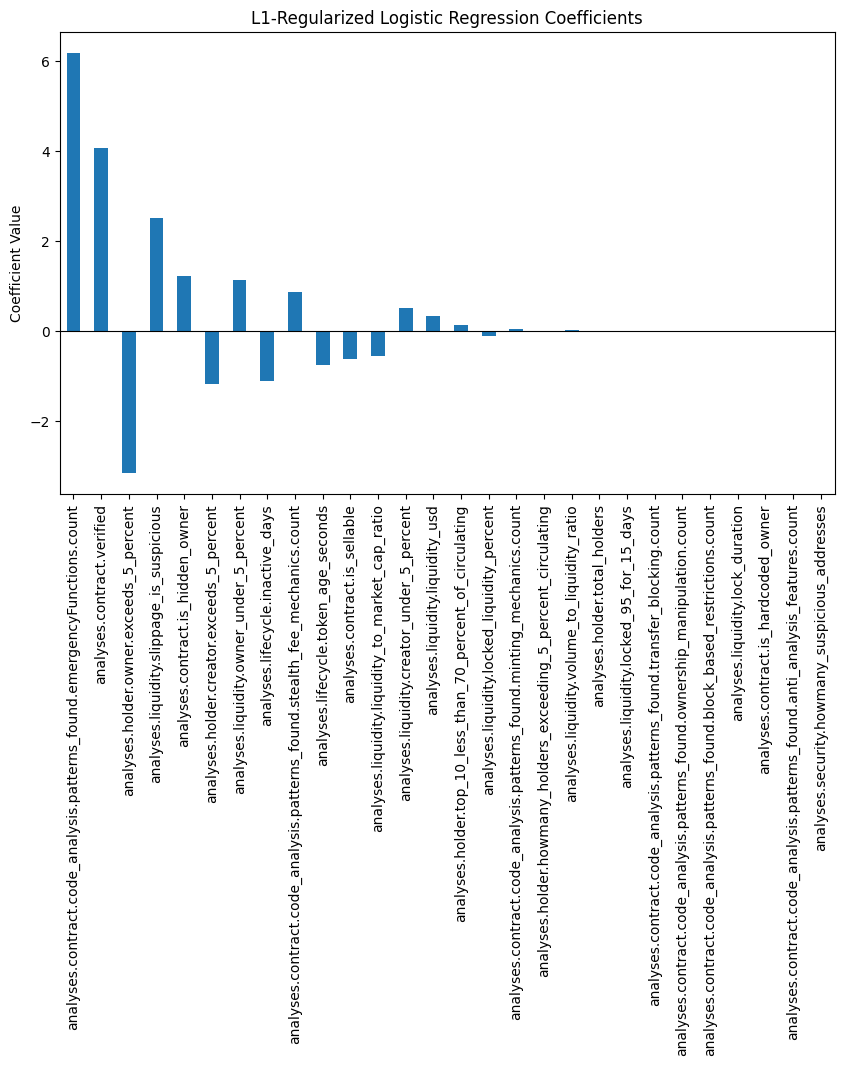

In [156]:
from matplotlib import pyplot as plt
# Sort by absolute importance
coefs = pd.Series(model.coef_[0], index=X_train.columns)

coefs_sorted = coefs.reindex(coefs.abs().sort_values(ascending=False).index)

# Plot
plt.figure(figsize=(10,6))
coefs_sorted.plot(kind="bar")
plt.title("L1-Regularized Logistic Regression Coefficients")
plt.axhline(0, color="black", linewidth=0.8)
plt.ylabel("Coefficient Value")
plt.savefig("coefficients.pdf",format="pdf")
plt.show()

In [137]:
# Good tokens in test set
X_test_good = X_test[y_test == 1]
probs = model.predict_proba(X_test_good)[:, 1]  # probability of class 1 ("Good")
print(probs[:150])

[9.48410237e-01 9.72468069e-01 9.99700428e-01 9.96023207e-01
 9.99338041e-01 9.99954405e-01 9.97224863e-01 9.83819849e-01
 9.54083227e-01 9.91482892e-01 9.92147192e-01 9.96459311e-01
 9.96140957e-01 9.99925412e-01 9.99956286e-01 1.46502144e-04
 9.24864391e-01 9.13478455e-01 9.23900656e-01 5.12597129e-01
 9.23752171e-01 9.97659151e-01 9.99992058e-01 9.99207314e-01
 9.99456531e-01 9.99976346e-01 7.84645883e-01 9.98787970e-01
 1.79033658e-01 9.99456199e-01 9.16025492e-01 9.87560869e-01
 9.99657605e-01 9.12316039e-01 9.93437904e-01 9.84062962e-01
 9.48405321e-01 9.99620905e-01 9.99976777e-01 9.14473600e-01
 9.89933215e-01 9.90177698e-01 9.88459547e-01 9.24888851e-01
 9.82164890e-01 9.99788078e-01 9.28707197e-01 9.88358467e-01
 9.93644345e-01 9.99888414e-01 9.47872589e-01 9.67287078e-01
 9.03361449e-01 5.55839421e-01 8.25195830e-01 5.66843810e-01
 8.27226342e-01 8.74174555e-01 9.88533344e-01 9.81759516e-01
 9.98528466e-01 9.86269652e-01 9.98199598e-01 9.53599404e-01
 9.99573560e-01 9.980197

In [138]:
# Bad tokens in test set
X_test_bad = X_test[y_test == 0]
probs = model.predict_proba(X_test_bad)[:, 1]  # probability of class 1 ("Good")
print(probs[:150])

[7.62489477e-03 2.71886887e-05 1.74267404e-03 1.09622588e-04
 5.49950190e-05 4.42357195e-03 3.87236978e-04 1.01345580e-05
 1.55396636e-04 6.07325675e-01 1.61163398e-03 1.02867432e-03
 8.99930233e-05 1.43359721e-04 2.77692069e-04 8.73515428e-02
 6.97409411e-05 8.33377873e-03 9.56734329e-01 1.00843515e-02
 8.94586617e-05 1.88526643e-04 1.14693971e-04 1.15604569e-03
 2.85600290e-04 3.74667274e-03 9.23877815e-03 3.74002432e-05
 2.01390414e-03 1.98377612e-01 3.62131772e-05 3.80073611e-04
 9.73307483e-05 2.76926763e-04 3.30257670e-04 1.47437905e-04
 4.32844405e-01 1.26893387e-03 2.25178178e-04 1.55814227e-05
 3.61057380e-06 1.76720378e-01 7.56779610e-01 4.32312112e-05
 2.66624421e-02 3.39139321e-06 1.05158315e-01 2.14321644e-02
 9.16658046e-04 5.12871189e-03 1.85898399e-03 4.20208419e-03
 9.25554610e-04 4.42764825e-03 1.05797934e-05 2.83850646e-02
 7.09582527e-04 6.40509381e-05 4.31820714e-06 3.54163691e-06
 3.47877451e-04 3.62022962e-03 7.36431975e-05 1.10013002e-03
 3.20028275e-02 6.348269

In [139]:
raw_scores = model.decision_function(X_test_good)
print(raw_scores[:50])

[ 2.91146388  3.56449079  8.11285573  5.52329473  7.31964468  9.99567701
  5.88427624  4.10765755  3.03392044  4.75712481  4.83900025  5.63988708
  5.55346949  9.50345297 10.037808   -8.82832398  2.51035252  2.35686633
  2.4965649   0.05039918  2.49445488  6.054898   11.74337193  7.1392901
  7.51699419 10.65196286  1.29294879  6.71424581 -1.52290829  7.5163841
  2.38953092  4.3743909   7.97920296  2.34224746  5.01986153  4.12304402
  2.91136342  7.87734432 10.67032797  2.3695235   4.58839606  4.61322893
  4.4502892   2.51070457  4.00859022  8.45908212  2.56699813  4.44146635
  5.05203436  9.10060697]


In [140]:
raw_scores = model.decision_function(X_test_bad)
print(raw_scores[:50])

[ -4.86868264 -10.51268234  -6.35059034  -9.11835748  -9.80821294
  -5.41637439  -7.85608639 -11.49954926  -8.76937436   0.4360846
  -6.42889378  -6.87845517  -9.31568841  -8.85001018  -8.18871999
  -2.34641007  -9.57065328  -4.7790696    3.09616625  -4.58663487
  -9.32164446  -8.57608267  -9.0731284   -6.76159327  -8.16063167
  -5.58313339  -4.67506392 -10.19379595  -6.20566415  -1.39646532
 -10.22605128  -7.87476546  -9.23729827  -8.19148052  -8.01530708
  -8.82195601  -0.27025536  -6.66830846  -8.39839336 -11.06941562
 -12.53164024  -1.53872721   1.13510409 -10.04890461  -3.59747503
 -12.59426635  -2.14117984  -3.82119731  -6.99385898  -5.26775884]


In [141]:
# Coefficients for each feature
coefficients = model.coef_[0]

# Intercept
intercept = model.intercept_[0]

# Feature names
features = X_train.columns

# Combine into a function
for f, c in zip(features, coefficients):
    print(f"{c:.4f} * {f}")

print(f"Intercept: {intercept:.4f}")

-1.9226 * analyses.holder.owner.exceeds_5_percent
-1.7092 * analyses.holder.creator.exceeds_5_percent
-0.0182 * analyses.holder.howmany_holders_exceeding_5_percent_circulating
0.2995 * analyses.holder.top_10_less_than_70_percent_of_circulating
2.5260 * analyses.liquidity.slippage_is_suspicious
-0.2364 * analyses.liquidity.locked_liquidity_percent
1.1573 * analyses.liquidity.owner_under_5_percent
0.7429 * analyses.liquidity.creator_under_5_percent
2.0555 * analyses.liquidity.locked_95_for_15_days
-0.8971 * analyses.lifecycle.token_age_seconds
-1.1462 * analyses.lifecycle.inactive_days
3.8891 * analyses.contract.verified
0.0580 * analyses.contract.code_analysis.patterns_found.minting_mechanics.count
-0.2561 * analyses.contract.is_sellable
0.0000 * analyses.contract.code_analysis.patterns_found.block_based_restrictions.count
0.7222 * analyses.contract.code_analysis.patterns_found.stealth_fee_mechanics.count
0.0000 * analyses.contract.code_analysis.patterns_found.ownership_manipulation.cou